In [249]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

import warnings
warnings.filterwarnings('ignore')

## I : We consider a model with (k+1) attributes. The first k are equal and all independent with the last one.

## What will happen to the prediction given by the Naive Bayes Classifier ?

In [251]:
def f(I,k):
    'Decision boundary for the case we have k equal attributes '
    a=np.power((1-I),k)
    b=np.power(I,k)
    return a/(a+b)

Text(0, 0.5, 'q_x')

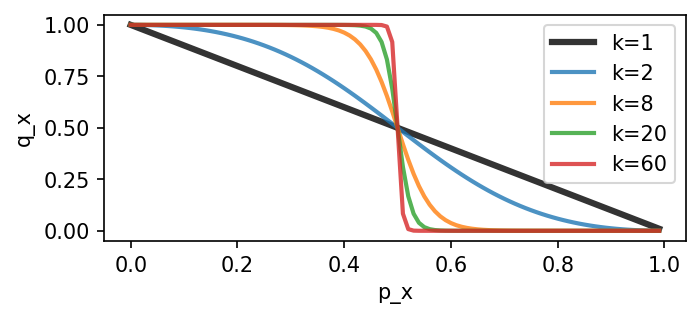

In [253]:
plt.figure(figsize=(5,2))
I=np.arange(0,1,0.01)

#Optimal decision boundary
plt.plot(I,f(I,1),label=f'k={1}',alpha=0.8,c='black',lw=3)

for k in [2,8,20,60]:
    plt.plot(I,f(I,k),label=f'k={k}',alpha=0.8,lw=2)
    plt.legend()

plt.xlabel('p_x')
plt.ylabel('q_x')
#plt.savefig('No_ind.png')

## II : Optimality of a Bayesian Classifier with disjunctive or conjunctive forms

We can consider for instance the following conjunction :

## $x_1\wedge x_2 \wedge x_3 \wedge x_4 \wedge x_5 \wedge x_6 \wedge x_7 \wedge x_8 \wedge x_9 \wedge x_{10}$ 

## We assign 1 to $x=(x_1,x_2,...,x_{10})$ if  $x_1=x_2=...=x_{10}=1$ and 0 otherwise

#### We consider that we are in the context described in the article on page 119 for the Theorem 6 : We will use as our dataset all the $2^{10}$ observations from the truth table and we will compare the 0-1 loss obtained with several classifiers against the Naive Bayesian's one.

In [255]:
def assign(X):
    '''assign the corresponding class to an instance in [0,1]^10
    according to the rule defined before'''
    
    if (X==np.ones(10)).sum()==10:
        return 1
    else:
        return 0

In [256]:
def digit_to_binary(x):
    'Transform an integer between 0 and 1023 to a binary number'
    X=np.zeros(10)
    i=0
    while x!=0:
        i+=1
        X[10-i]=x%2
        x=(x//2)
    return X

In [257]:
X=np.array([digit_to_binary(n) for n in range(0,1024)])
np.random.shuffle(X)
y=np.array([assign(x) for x in X])

In [258]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def launch_comparison(X,y):
    'Comparison of the 0-1 loss obtained with several classifiers on datasets using only binary features'
    
    
    clf1 = BernoulliNB(alpha=0)
    clf1.fit(X,y)
    y_pred1=clf1.predict(X)
    print('0-1 loss obtained using the Naive Bayes Classifier',1024-accuracy_score(y_pred1,y,False))

    clf2=LDA()
    clf2.fit(X,y)
    y_pred2=clf2.predict(X)
    print('0-1 loss obtained using the LDA Classifier',1024-accuracy_score(y_pred2,y,False))

    clf3=knn(3)
    clf3.fit(X,y)
    y_pred3=clf3.predict(X)
    print('0-1 loss obtained using the 3-NN Classifier',1024-accuracy_score(y_pred3,y,False))

    clf4 = DecisionTreeClassifier()
    clf4.fit(X,y)
    y_pred4=clf4.predict(X)
    print('0-1 loss obtained using a Decision Tree',1024-accuracy_score(y_pred4,y,False))

launch_comparison(X,y)

0-1 loss obtained using the Naive Bayes Classifier 0
0-1 loss obtained using the LDA Classifier 1
0-1 loss obtained using the 3-NN Classifier 1
0-1 loss obtained using a Decision Tree 0


We observe that, indeed, the Naive Bayes Classifier is optimal under the 0-1 loss just like the Decision Tree. This is not surprising since a decision tree is designed to find a set of rules by construction.

We also notice that, classifiers which use the principle 'Birds fly in flock' didn't succeed in finding the rule which assign 1 to the observation $\underbrace{(1,1,...,1)}_{10}$. They simply associate each observation to 0. This is due to the fact that there is only one represent for the class 1 (So the majority for the 3-NN can't be 1 for instance).

#### Let's see now, how will react the Naive Bayes Classifier in a situation in which the decision rule is more complex.

We can consider for instance the following disjunction of conjunctions :

## $(x_1\wedge x_2 \wedge x_3) \lor (x_4\wedge x_5) \lor (x_6 \wedge x_7 \wedge x_8 \wedge x_9) \lor x_{10}$ 

## We assign 1 to $x=(x_1,x_2,...,x_{10})$ if  $x_1=x_2=x_3=1$ or $x_4=x_5=1$ or $x_6 = x_7 = x_8 = x_9 = 1$ or $x_{10}=1$ and 0 otherwise

#### As before, we will use as our dataset all the $2^{10}$ observations from the truth table and we will compare the 0-1 loss obtained with several classifiers against the Naive Bayesian's one.

In [259]:
def assign(X):
    'New decision rule'
    if ((X[0]==X[1]==X[2]==1) or (X[3]==X[4]==1) or (X[5]==X[6]==X[7]==X[8]==1) or (X[9]==1)):
        return 1
    else:
        return 0
    
X=np.array([digit_to_binary(n) for n in range(0,1024)])
np.random.shuffle(X)
y=np.array([assign(x) for x in X])

In [260]:
launch_comparison(X,y)

0-1 loss obtained using the Naive Bayes Classifier 62
0-1 loss obtained using the LDA Classifier 71
0-1 loss obtained using the 3-NN Classifier 24
0-1 loss obtained using a Decision Tree 0


This time, the optimal classifier is the decision tree. This is not a surprise since, as said before, the decision tree is precisely designed to discover set of rules, whatever their complexity. Nevertheless, we see that even the 3-NN achieve a better 0-1 loss than the NBC and so, that it is not anymore optimal if we add some complexity to the prediction rules.

## III - Efficiency of the NBC on small datasets

Here, we will try to observe the behaviour of the NBC on small dataset compared to others classifier.
We will take 3 well-known toy datasets : Iris, Wine, and Breast_Cancer. For all these datasets, the features are continous and so we will use normal law for approximate their behaviours conditioned to the classes

We will cut the dataset into a training set and a testing set (70%/30%) and will observe the accuracies on the testing sets.

In [261]:
from sklearn.naive_bayes import GaussianNB

def launch_comparison_datasets(X_train,y_train,X_test,y_test):
    '''Comparison of the results on the testing set for different classifiers
    using our toy datasets'''
    
    
    clf1 = GaussianNB()
    clf1.fit(X_train,y_train)
    y_pred1=clf1.predict(X_test)
    print('Accuracy obtained using the Naive Bayes Classifier :',100*accuracy_score(y_pred1,y_test),'%')

    clf2=LDA()
    clf2.fit(X_train,y_train)
    y_pred2=clf2.predict(X_test)
    print('Accuracy obtained using the LDA Classifier :',100*accuracy_score(y_pred2,y_test),'%')

    clf3=knn(3)
    clf3.fit(X_train,y_train)
    y_pred3=clf3.predict(X_test)
    print('Accuracy obtained using the 3-NN Classifier :',100*accuracy_score(y_pred3,y_test),'%')

    clf4 = DecisionTreeClassifier()
    clf4.fit(X_train,y_train)
    y_pred4=clf4.predict(X_test)
    print('Accuracy obtained using a Decision Tree :',100*accuracy_score(y_pred4,y_test),'%')

In [408]:
import sklearn.datasets as data
from sklearn.model_selection import train_test_split as tts


def efficiency_on_dataset(dataset,data):
    'cutting and training'
    if len(data)>0:
        X=data[0]
        y=data[1]
    else:
        X=dataset['data']
        y=dataset['target']
        
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)
    launch_comparison_datasets(X_train,y_train,X_test,y_test)

print('SMALL DATASET : size_max = 569')
print('Iris dataset')
data_1=data.load_iris()
print('------------')
efficiency_on_dataset(data_1,[])
print('------------')
print('Wine dataset')
print('------------')
data_2=data.load_wine()
efficiency_on_dataset(data_2,[])
print('------------')
print('Breast cancer')
data_3=data.load_breast_cancer()
print('------------')
efficiency_on_dataset(data_3,[])

SMALL DATASET : size_max = 569
Iris dataset
------------
Accuracy obtained using the Naive Bayes Classifier : 100.0 %
Accuracy obtained using the LDA Classifier : 97.77777777777777 %
Accuracy obtained using the 3-NN Classifier : 97.77777777777777 %
Accuracy obtained using a Decision Tree : 97.77777777777777 %
------------
Wine dataset
------------
Accuracy obtained using the Naive Bayes Classifier : 94.44444444444444 %
Accuracy obtained using the LDA Classifier : 98.14814814814815 %
Accuracy obtained using the 3-NN Classifier : 70.37037037037037 %
Accuracy obtained using a Decision Tree : 94.44444444444444 %
------------
Breast cancer
------------
Accuracy obtained using the Naive Bayes Classifier : 92.39766081871345 %
Accuracy obtained using the LDA Classifier : 97.07602339181285 %
Accuracy obtained using the 3-NN Classifier : 91.81286549707602 %
Accuracy obtained using a Decision Tree : 92.39766081871345 %


We notice that the NBC is among the best predictor for our testing set and it sometimes outperformed the decision tree.
Nevertheless, the LDA Classifier give a better prediction for the two last datasets.

At the end, the NBC seems to be adapted for small datasets.
Nevertheless it could be a good idea to test it on more realistic dataset. I propose tu use datasets from Kaggle for instance.

In [544]:
# ZOO DATASET : https://www.kaggle.com/uciml/zoo-animal-classification#class.csv
print('Zoo dataset')
data_zoo=pd.read_csv('zoo.csv')
y=data_zoo['class_type'].to_numpy()
X=data_zoo.drop(['class_type','animal_name'],axis=1).to_numpy()
print('size :',len(X))
efficiency_on_dataset(data_zoo,[X,y])

Zoo dataset
size : 101
Accuracy obtained using the Naive Bayes Classifier : 96.7741935483871 %
Accuracy obtained using the LDA Classifier : 96.7741935483871 %
Accuracy obtained using the 3-NN Classifier : 93.54838709677419 %
Accuracy obtained using a Decision Tree : 96.7741935483871 %


In [409]:
#GLASS DATASET : https://www.kaggle.com/uciml/glass - Classification of type of Glass
print('GLASS DATASET')
data_glass=pd.read_csv('glass.csv')
y=data_glass['Type'].to_numpy()
X=data_glass.drop('Type',axis=1).to_numpy()
print('size :',len(X))
efficiency_on_dataset(data_glass,[X,y])

GLASS DATASET
size : 214
Accuracy obtained using the Naive Bayes Classifier : 46.15384615384615 %
Accuracy obtained using the LDA Classifier : 63.07692307692307 %
Accuracy obtained using the 3-NN Classifier : 64.61538461538461 %
Accuracy obtained using a Decision Tree : 56.92307692307692 %


In [471]:
#Pokemon dataset : https://www.kaggle.com/abcsds/pokemon/data
print('POKEMON DATASET')
data_pokemon=pd.read_csv('Pokemon.csv')
y=data_pokemon['Legendary'] #predict if the pokemon is legendary or not
X=data_pokemon[data_pokemon.columns[4:11]].to_numpy()
print('size :',len(X))
efficiency_on_dataset(data_pokemon,[X,y])

POKEMON DATASET
size : 800
Accuracy obtained using the Naive Bayes Classifier : 92.91666666666667 %
Accuracy obtained using the LDA Classifier : 92.5 %
Accuracy obtained using the 3-NN Classifier : 95.0 %
Accuracy obtained using a Decision Tree : 95.83333333333334 %


Here we observe that the performance of the NBC is not always among the best. It depends on the cases.

We can also see how it will perfom using bigger datasets.

In [411]:
#Banknote dataset : http://archive.ics.uci.edu/ml/datasets/banknote+authentication
print("BANKNOTE DATASET")
data_banknote=pd.read_csv('data_banknote_authentication.csv')
y=data_banknote['Class']
X=data_banknote.drop('Class',axis=1)
print('size :',len(X))
efficiency_on_dataset(data_banknote,[X,y])

BANKNOTE DATASET
size : 1372
Accuracy obtained using the Naive Bayes Classifier : 83.25242718446601 %
Accuracy obtained using the LDA Classifier : 97.0873786407767 %
Accuracy obtained using the 3-NN Classifier : 99.75728155339806 %
Accuracy obtained using a Decision Tree : 97.57281553398059 %


**Mushroom dataset** : https://www.kaggle.com/uciml/mushroom-classification/kernels
This time the attributes are categorical so we will use a multinomial law for each feature conditioned to the classes.

In [504]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

data_mushroom=pd.read_csv('mushrooms.csv')

In [507]:
y=data_mushroom['class'].astype("category").cat.codes.to_numpy()

X=pd.DataFrame()
for column in data_mushroom.columns:
    if column!='class':
        X[column]=data_mushroom[column].astype("category").cat.codes
        
X=X.to_numpy()

In [508]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3,random_state=0)

print('MUSHROOM dataset : Size =',len(y))

clf1 = MultinomialNB()
clf1.fit(X_train,y_train)
y_pred1=clf1.predict(X_test)
print('Accuracy obtained using the Naive Bayes Classifier :',100*accuracy_score(y_pred1,y_test),'%')

clf2=LDA()
clf2.fit(X_train,y_train)
y_pred2=clf2.predict(X_test)
print('Accuracy obtained using the LDA Classifier :',100*accuracy_score(y_pred2,y_test),'%')

clf3=knn(3)
clf3.fit(X_train,y_train)
y_pred3=clf3.predict(X_test)
print('Accuracy obtained using the 3-NN Classifier :',100*accuracy_score(y_pred3,y_test),'%')

clf4 = DecisionTreeClassifier()
clf4.fit(X_train,y_train)
y_pred4=clf4.predict(X_test)
print('Accuracy obtained using a Decision Tree :',100*accuracy_score(y_pred4,y_test),'%')

MUSHROOM dataset : Size = 8124
Accuracy obtained using the Naive Bayes Classifier : 80.76292042657917 %
Accuracy obtained using the LDA Classifier : 94.74979491386382 %
Accuracy obtained using the 3-NN Classifier : 99.91796554552911 %
Accuracy obtained using a Decision Tree : 100.0 %


The NBC present still the lowest performances and this time this is really more pronounced, but this was expected as explained in the article and our report (Bigger dataset => more variance).

Moreover, the paper explains that in practice, the best using of a NBC should be in a situation in which we have a small datasets with many attributes for each feature. So here, it's expected that the NBC should perform well on the wine dataset and the zoo dataset for instance and it's indeed the case.

## Detection of 'irrelevant' features using a Random Forest Algorithm

#### Here, for each previous dataset studied, we are going to find the features which seems to be the 3 more discriminant features using a random forest algorithm and then, we will see if there is an impact on the accuracy of the NBC.

In [412]:
from sklearn.ensemble import RandomForestClassifier

In [519]:
def detect_and_transform(dataset,data,k,is_gaussian=True):
    
    if len(data)>0:
        X=data[0]
        y=data[1]
    else:
        X=dataset['data']
        y=dataset['target']
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3,random_state=0)
    
    rf = RandomForestClassifier(n_jobs=2, random_state=0)
    rf.fit(X_train,y_train)
    feat_discr=np.argsort(-rf.feature_importances_)[0:k]

    
    if is_gaussian:
        clf1 = GaussianNB()
    else:
        clf1=MultinomialNB()
        
        
    clf1.fit(X_train,y_train)
    y_pred1=clf1.predict(X_test)
    print('Accuracy obtained using the Naive Bayes Classifier with all the features:',100*accuracy_score(y_pred1,y_test),'%')
    
    clf1.fit(X_train[:,feat_discr],y_train)
    y_pred1=clf1.predict(X_test[:,feat_discr])
    print(f'Accuracy obtained using the Naive Bayes Classifier with the {k} most discriminant features:',100*accuracy_score(y_pred1,y_test),'%')
    print('\n')

In [469]:
print('Wine dataset')
print('------------')
detect_and_transform(data_2,[],6)
print('------------')
print('Breast cancer')
print('------------')
detect_and_transform(data_3,[],6)

Wine dataset
------------
Accuracy obtained using the Naive Bayes Classifier with all the features: 94.44444444444444 %
Accuracy obtained using the Naive Bayes Classifier with the 6 most discriminant features: 96.29629629629629 %
------------
Breast cancer
------------
Accuracy obtained using the Naive Bayes Classifier with all the features: 92.39766081871345 %
Accuracy obtained using the Naive Bayes Classifier with the 6 most discriminant features: 93.56725146198829 %


With the wine and the breat cancer we succeed in obtaining better results using only the 6 most discriminant features according to the random forest algorithm

In [541]:
# ZOO DATASET : https://www.kaggle.com/uciml/zoo-animal-classification#class.csv
print('Zoo dataset')
y=data_zoo['class_type'].to_numpy()
X=data_zoo.drop(['class_type','animal_name'],axis=1).to_numpy()
print('size :',len(X))
detect_and_transform(data_zoo,[X,y],14,is_gaussian=False)


#GLASS DATASET : https://www.kaggle.com/uciml/glass - Classification of type of Glass
print('GLASS DATASET')
y=data_glass['Type'].to_numpy()
X=data_glass.drop('Type',axis=1).to_numpy()
print('size :',len(X))
detect_and_transform(data_glass,[X,y],2,is_gaussian=True)


#Pokemon dataset : https://www.kaggle.com/abcsds/pokemon/data
print('POKEMON DATASET')
y=data_pokemon['Legendary'] #predict if the pokemon is legendary or not
X=data_pokemon[data_pokemon.columns[4:11]].to_numpy()
print('size :',len(X))
detect_and_transform(data_pokemon,[X,y],2,is_gaussian=True)


#Banknote dataset : http://archive.ics.uci.edu/ml/datasets/banknote+authentication
print("BANKNOTE DATASET")
y=data_banknote['Class'].to_numpy()
X=data_banknote.drop('Class',axis=1).to_numpy()
print('size :',len(X))
detect_and_transform(data_banknote,[X,y],2,is_gaussian=True)

print('MUSHROOM dataset',len(y))
y=data_mushroom['class'].astype("category").cat.codes.to_numpy()
X=pd.DataFrame()
for column in data_mushroom.columns:
    if column!='class':
        X[column]=data_mushroom[column].astype("category").cat.codes
        
X=X.to_numpy()

print('size :',len(X))
detect_and_transform(data_mushroom,[X,y],3,is_gaussian=False)



Zoo dataset
size : 101
Accuracy obtained using the Naive Bayes Classifier with all the features: 93.54838709677419 %
Accuracy obtained using the Naive Bayes Classifier with the 14 most discriminant features: 93.54838709677419 %


GLASS DATASET
size : 214
Accuracy obtained using the Naive Bayes Classifier with all the features: 46.15384615384615 %
Accuracy obtained using the Naive Bayes Classifier with the 2 most discriminant features: 58.46153846153847 %


POKEMON DATASET
size : 800
Accuracy obtained using the Naive Bayes Classifier with all the features: 92.91666666666667 %
Accuracy obtained using the Naive Bayes Classifier with the 2 most discriminant features: 92.08333333333333 %


BANKNOTE DATASET
size : 1372
Accuracy obtained using the Naive Bayes Classifier with all the features: 83.25242718446601 %
Accuracy obtained using the Naive Bayes Classifier with the 2 most discriminant features: 87.13592233009709 %


MUSHROOM dataset 1372
size : 8124
Accuracy obtained using the Naive Bay

Whatever the size of the dataset here, we observe that capturing the most discriminant features using the random forest algorithm have a tendancy to indeed, improve (sometimes a lot) the performances of the NBC. These features can be corellated since the random forest select them according to the ability to well separate the dataset into classes rather than their using their correlation.

## Random Naive Bayesian Classifier

The idea here is to adapt the principle of the Random Forest Algorithm to the Naive Bayesian Classifier and see if there is an impact on the result with unknown observations.

For this experiment we will use the leave-one-out cross validation for estimating the generalization accuracy.

In [352]:
def majority_vote(predictions):
    final_prediction=[]
    for i in range(len(predictions[0])):
        choices,counts=np.unique(predictions[:,i],return_counts=True)
        to_select=np.argmax(counts)
        final_prediction.append(choices[to_select])
        
    return final_prediction   

In [388]:
def random_nbc(X,y,C,X_test,seed,is_gaussian=True):
    np.random.seed(seed)
    predictions=[]
    N=int(0.4*len(X))
    p=np.random.randint(len(X[0]))
    for i in range (C):
        choice=np.random.choice(range(len(X)),N)
        features=np.random.choice(range(len(X[0])),p,replace=False)
        
        X_train=X[choice][:,features]
        y_train=y[choice]
        
        if is_gaussian:
            clf=GaussianNB()
        else:
            clf=MultinomialNB()
            
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test[:,features])
        predictions.append(y_pred)
    
    predictions=np.array(predictions)
    final_prediction=majority_vote(predictions)
        
    return final_prediction

In [354]:
from tqdm import tqdm_notebook as tqdm
from IPython.display import clear_output

In [381]:
def loo_cross_validation(X,y,C,seed,is_gaussian=True):
    n=len(X)
    accuracy_1=0
    accuracy_2=0
    for i in range(n):
        clear_output(wait=True)
        print('LOADING : ',round(100*i/n,5),"%")
        if is_gaussian:
            clf=GaussianNB()
        else:
            clf=MultinomialNB()
        
        I=list(range(0,i))+list(range(i+1,n))
        X_train=X[I]
        y_train=y[I]
        X_test=X[i].reshape(1,-1)
        y_test=y[i].reshape(1,-1)
        
        clf.fit(X_train,y_train)
        y_pred1=clf.predict(X_test)
        y_pred2=random_nbc(X_train,y_train,C,X_test,seed,is_gaussian)
        
        accuracy_1+=np.allclose(y_pred1,y_test)
        accuracy_2+=np.allclose(y_pred2,y_test)
        
    return accuracy_1/n,accuracy_2/n

## *First result : NBC, Second Result : Random NBC*

## TOY DATASETS

In [393]:
X=data_2['data']
y=data_2['target']
print('WINE')
loo_cross_validation(X,y,20,0)

LOADING :  99.4382 %


(0.9775280898876404, 0.9831460674157303)

In [394]:
X=data_3['data']
y=data_3['target']
print('BREAST_CANCER')
loo_cross_validation(X,y,20,1)

LOADING :  99.82425 %


(0.9384885764499121, 0.9332161687170475)

## GLASS DATASET : https://www.kaggle.com/uciml/glass

In [360]:
y=data_glass['Type'].to_numpy()
X=data_glass.drop('Type',axis=1).to_numpy()
print('GLASS DATASET')
loo_cross_validation(X,y,20,0,True)

LOADING :  99.53271 %


(0.4766355140186916, 0.5046728971962616)

## ZOO DATASET : https://www.kaggle.com/uciml/zoo-animal-classification#class.csv

In [522]:
data_zoo=pd.read_csv('zoo.csv')
y=data_zoo['class_type'].to_numpy()
X=data_zoo.drop(['class_type','animal_name'],axis=1).to_numpy()
loo_cross_validation(X,y,20,0,True)

LOADING :  99.0099 %


(0.9504950495049505, 0.9702970297029703)

## Pokemon DATASET

In [365]:
X=data_pokemon[data_pokemon.columns[4:11]].to_numpy()
y=data_pokemon['Legendary'].to_numpy() #predict if the pokemon is legendary or not
loo_cross_validation(X,y,20,0,True)

LOADING :  99.875 %


(0.93, 0.93375)

For small datasets, the 'random strategy' seems to make the NBC more reliable for the prediction on unknown observations. 

# Banknote dataset : http://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [395]:
y=data_banknote['Class'].to_numpy()
X=data_banknote.drop('Class',axis=1).to_numpy()
loo_cross_validation(X,y,20,1,True)

LOADING :  99.92711 %


(0.8396501457725948, 0.7193877551020408)

## Mushroom dataset :

In [399]:
y=data_mushroom['class'].astype("category").cat.codes.to_numpy()

X=pd.DataFrame()
for column in data_mushroom.columns:
    if column!='class':
        X[column]=data_mushroom[column].astype("category").cat.codes

X=X.to_numpy()
        
loo_cross_validation(X,y,10,0,True)

LOADING :  99.98769 %


(0.921097981290005, 0.8481043820777941)

**Little Remark** : For two last datasets, using a leave-one-out-cross validation, we can see that finally, the generalization accuracy is much better than before, so at the end it should be a great concurrent for others classifiers. Nevertheless, for these two specific datasets, the random NBC didn't succeed in obtaining better results than the traditional ones.